In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv")
print(df.head)

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Util

In [ ]:
print(df.shape)

(1460, 81)


In [ ]:
## print the DataFrame's data types
pd.set_option('display.max_rows', None)
#pd.reset_option('max_rows')
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [ ]:
## check for missing values
print(df.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

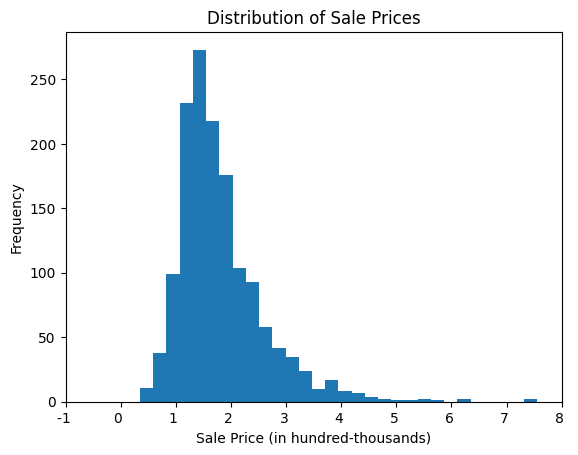

In [ ]:
# Visualize the distribution of 'SalePrice'
plt.hist(df['SalePrice'], bins=30)  # Adjust bins as needed for clarity

# Scale x-axis by dividing tick labels by 1000
ticks, labels = plt.xticks()
plt.xticks(ticks, labels=[f"{int(tick / 100000)} " for tick in ticks])

plt.xlabel('Sale Price (in hundred-thousands)')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Prices')
plt.show()

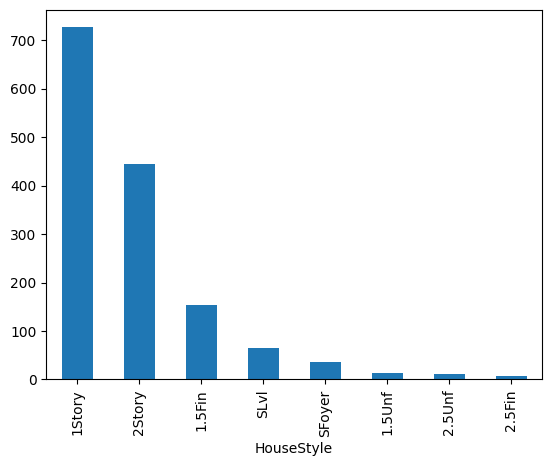

In [ ]:
## visualize the distribution of a categorical column
df['HouseStyle'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
## calculate basic statistics for a numeric column
print(df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [ ]:
## calculate the correlation between two numeric columns
print('Correlation between Sale Price and Number of Bedrooms (Above Ground): ',df['SalePrice'].corr(df['BedroomAbvGr']))
print('Correlation between Sale Price and Lot Area: ',df['SalePrice'].corr(df['LotArea']))

Correlation between Sale Price and Number of Bedrooms (Above Ground):  0.16821315430073985
Correlation between Sale Price and Lot Area:  0.2638433538714057


In [ ]:
## Method 1: group the data by a categorical column and calculate statistics
grouped_df = df.groupby('BldgType')['SalePrice'].mean()
print(grouped_df)

BldgType
1Fam      185763.807377
2fmCon    128432.258065
Duplex    133541.076923
Twnhs     135911.627907
TwnhsE    181959.342105
Name: SalePrice, dtype: float64


In [ ]:
## Method 2: group the data by a categorical column and calculate statistics
grouped_df = df.groupby('BldgType')['LotArea'].mean()
print(grouped_df)

BldgType
1Fam      11240.634426
2fmCon    15785.064516
Duplex     9720.057692
Twnhs      2391.209302
TwnhsE     4766.605263
Name: LotArea, dtype: float64


In [ ]:
## Method 3: group the data by a categorical column and calculate statistics
grouped_df = df.groupby('OverallQual')['SalePrice'].mean()
print(grouped_df)

OverallQual
1      50150.000000
2      51770.333333
3      87473.750000
4     108420.655172
5     133523.347607
6     161603.034759
7     207716.423197
8     274735.535714
9     367513.023256
10    438588.388889
Name: SalePrice, dtype: float64


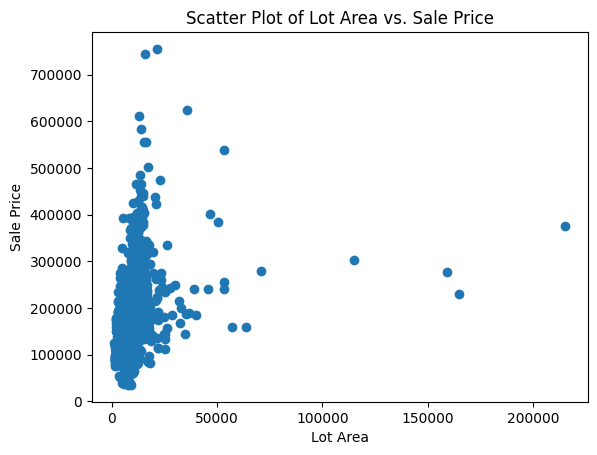

In [ ]:
## create a scatter plot to visualize the relationship between two numeric columns
plt.scatter(df['LotArea'], df['SalePrice'])
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.title('Scatter Plot of Lot Area vs. Sale Price')
plt.show()

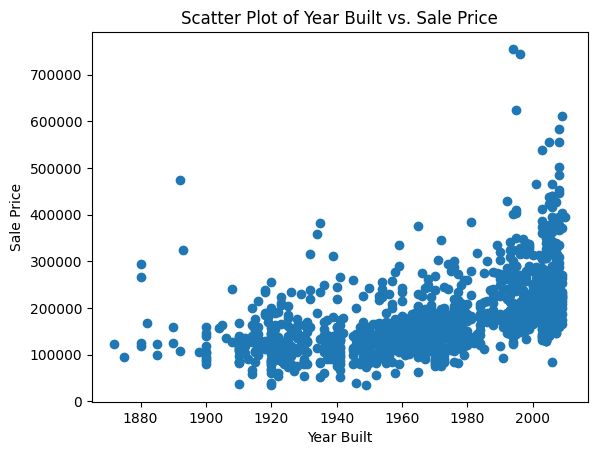

In [ ]:
## create a scatter plot to visualize the relationship between two numeric columns
plt.scatter(df['YearBuilt'], df['SalePrice'])
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.title('Scatter Plot of Year Built vs. Sale Price')
plt.show()

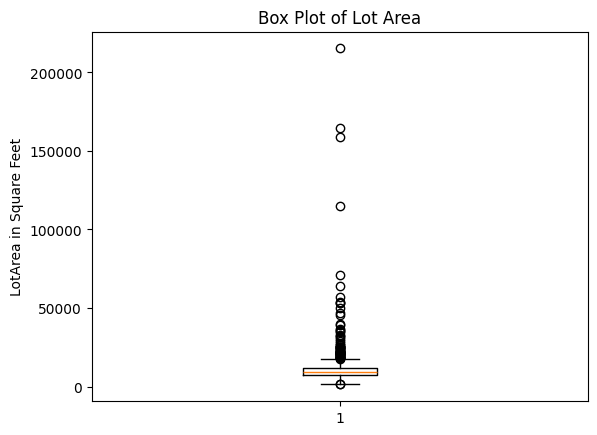

In [ ]:
## create a box plot to visualize the distribution of a numeric column
plt.boxplot(df['LotArea'])
plt.ylabel('LotArea in Square Feet')
plt.title('Box Plot of Lot Area')
plt.show()

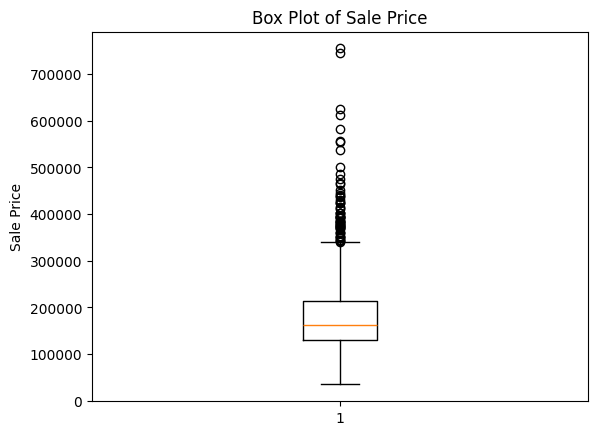

In [ ]:
## create a box plot to visualize the distribution of a numeric column
plt.boxplot(df['SalePrice'])
plt.ylabel('Sale Price')
plt.title('Box Plot of Sale Price')
plt.show()

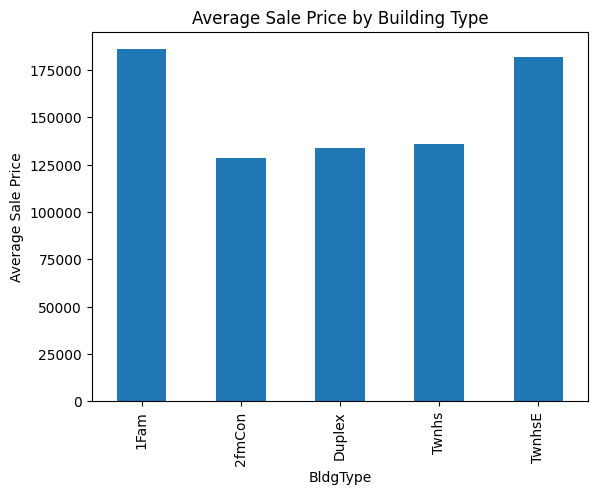

In [ ]:
## create a bar plot to visualize the mean of a numeric column for each category of a categorical column
df_grouped = df.groupby('BldgType')
df_grouped = df_grouped['SalePrice'].mean()
df_grouped.plot(kind='bar')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Building Type')
plt.show()

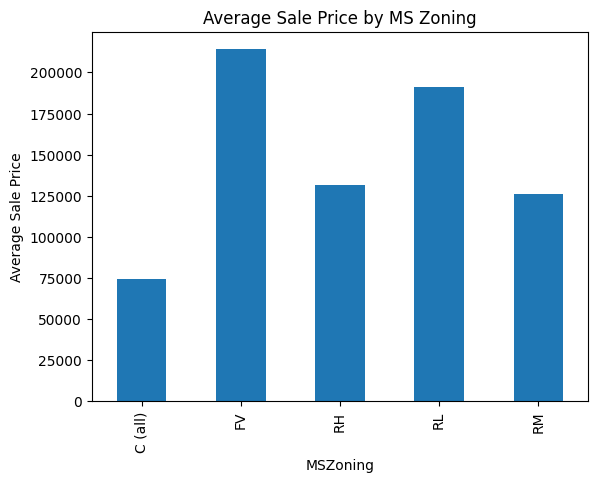

In [ ]:
## create a bar plot to visualize the mean of a numeric column for each category of a categorical column
df_grouped = df.groupby('MSZoning')
df_grouped = df_grouped['SalePrice'].mean()
df_grouped.plot(kind='bar')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by MS Zoning')
plt.show()
'''    A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park
       RM	Residential Medium Density'''

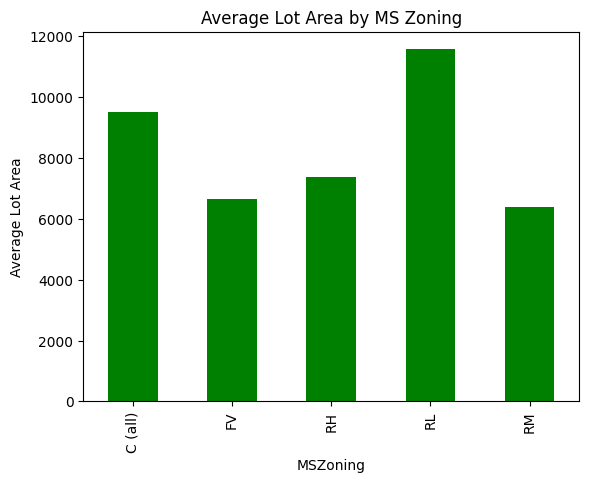

In [ ]:
## create a bar plot to visualize the mean of a numeric column for each category of a categorical column
df_grouped = df.groupby('MSZoning')
df_grouped = df_grouped['LotArea'].mean()
df_grouped.plot(kind='bar',color = 'green')
plt.ylabel('Average Lot Area')
plt.title('Average Lot Area by MS Zoning')
plt.show()

In [ ]:
## create a pivot table to summarize the data
## Question: For each MSZone, what is the Sale Price average by Building Type
pivot_table = df.pivot_table(index='BldgType', columns='MSZoning', values='SalePrice', aggfunc='mean')
pivot_table = pivot_table.round(0)
'''    A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park
       RM	Residential Medium Density'''

print(pivot_table)

MSZoning   C (all)        FV        RH        RL        RM
BldgType                                                  
1Fam       67931.0  240940.0  110770.0  193592.0  125437.0
2fmCon    133900.0       NaN  180000.0  134662.0  111075.0
Duplex         NaN       NaN  144667.0  132380.0  136300.0
Twnhs          NaN  167533.0       NaN  178850.0  106162.0
TwnhsE         NaN  180410.0  157000.0  206653.0  146020.0


In [ ]:
## create a pivot table to summarize the data
## Question: For each MSZone, what is the Overall Quality average by Building Type
pivot_table2 = df.pivot_table(index='BldgType', columns='MSZoning', values='OverallQual', aggfunc='mean')
pivot_table2 = pivot_table.round(1)
'''    A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park
       RM	Residential Medium Density'''

print(pivot_table2)

MSZoning  C (all)   FV   RH   RL   RM
BldgType                             
1Fam          3.7  7.4  4.9  6.2  5.4
2fmCon        6.0  NaN  5.5  4.7  5.1
Duplex        NaN  NaN  5.3  4.9  5.5
Twnhs         NaN  7.0  NaN  6.7  5.5
TwnhsE        NaN  6.9  6.5  7.3  5.8


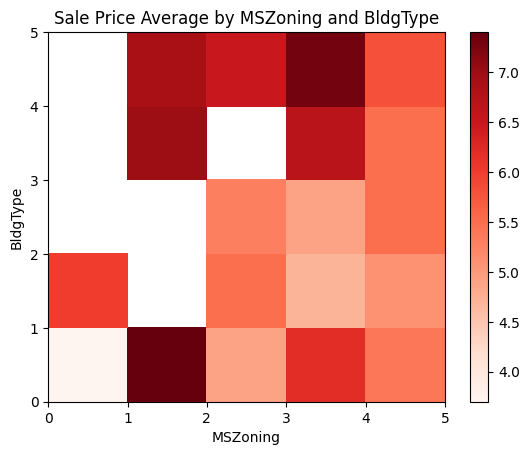

In [ ]:
plt.pcolor(pivot_table, cmap='Reds')
plt.colorbar()
plt.xlabel('MSZoning')
plt.ylabel('BldgType')
plt.title('Sale Price Average by MSZoning and BldgType')
plt.show()

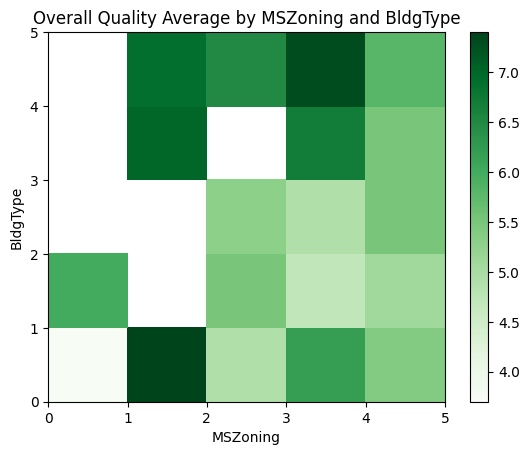

In [ ]:
plt.pcolor(pivot_table2, cmap='Greens')
plt.colorbar()
plt.xlabel('MSZoning')
plt.ylabel('BldgType')
plt.title('Overall Quality Average by MSZoning and BldgType')
plt.show()

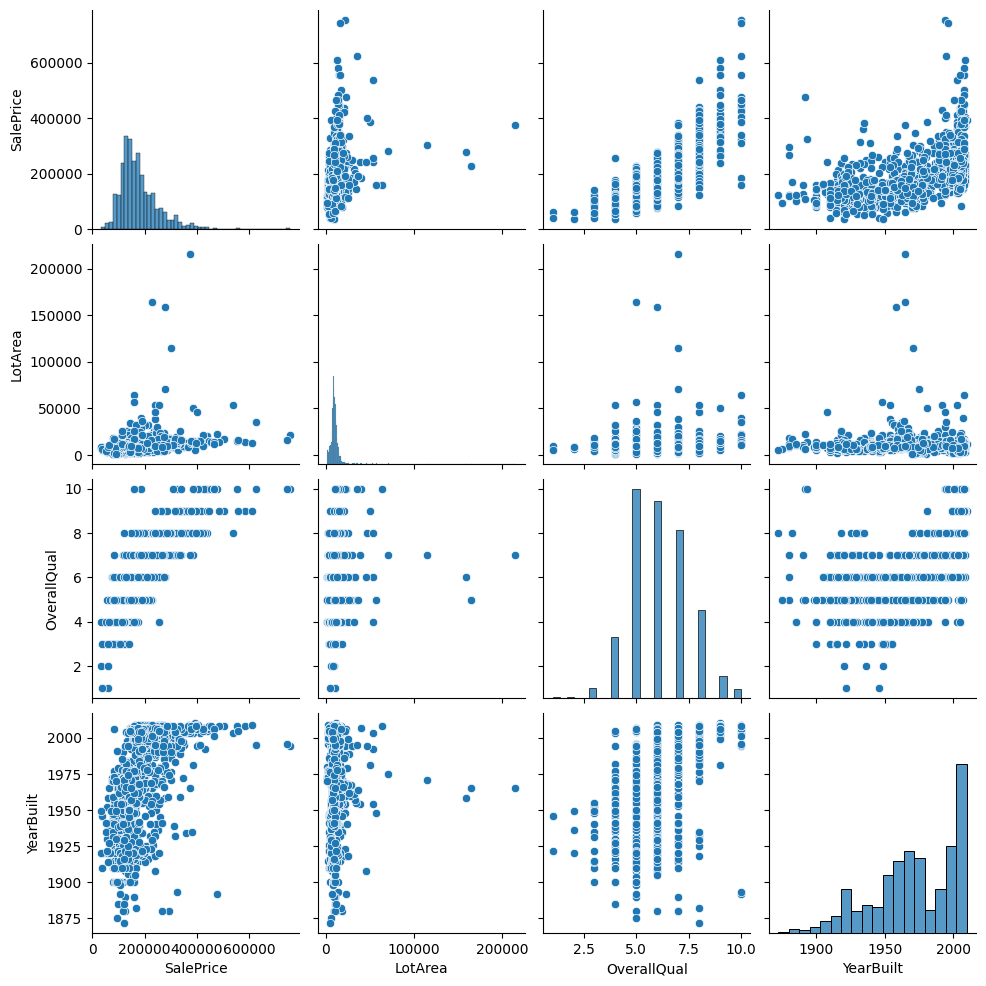

In [ ]:
sns.pairplot(df, vars = ['SalePrice', 'LotArea', 'OverallQual', 'YearBuilt'])
plt.show()

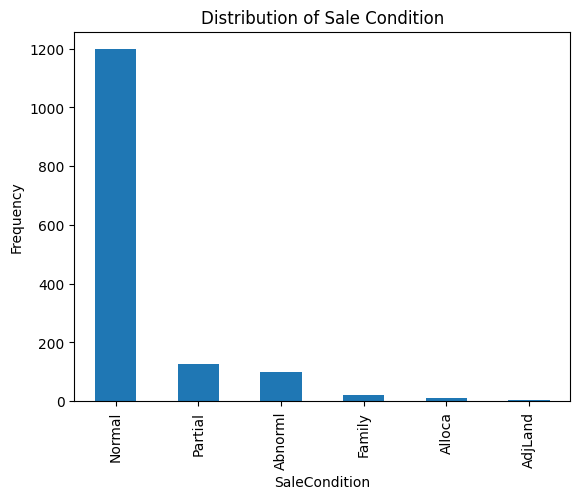

In [ ]:
df['SaleCondition'].value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Condition')
plt.show()

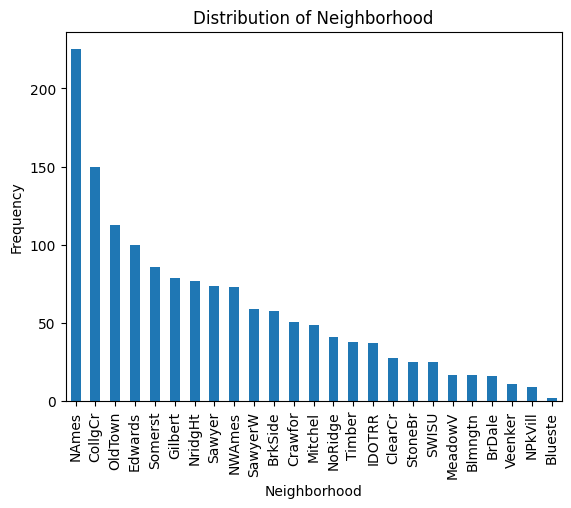

In [ ]:
df['Neighborhood'].value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Distribution of Neighborhood')
plt.show()

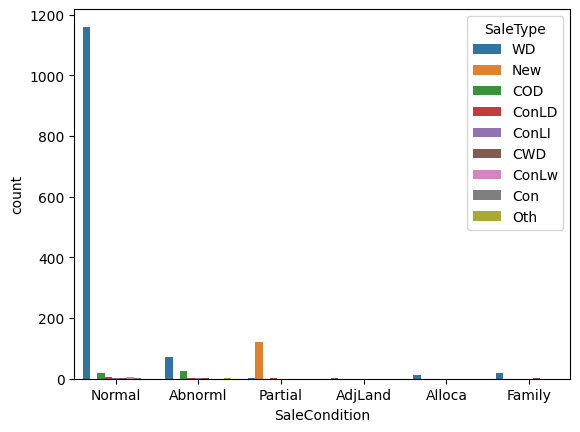

In [ ]:
## create a countplot to visualize the count of a categorical column by the categories of another categorical column
sns.countplot(x='SaleCondition', hue='SaleType', data=df)
plt.show()

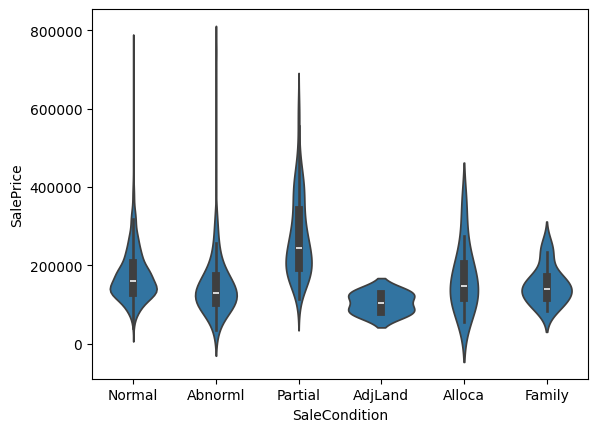

In [ ]:
sns.violinplot(x='SaleCondition',y='SalePrice',data=df)
plt.show()

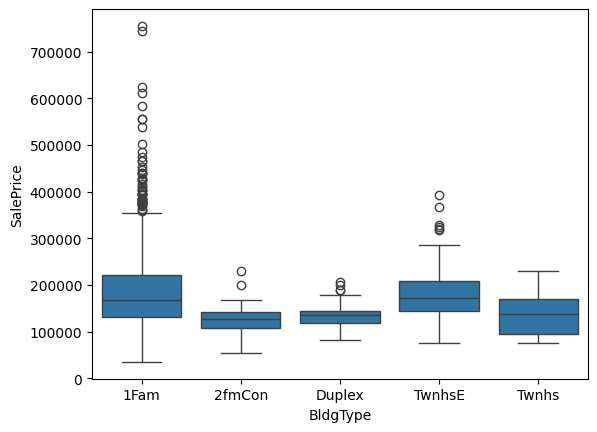

In [4]:
sns.boxplot(x='BldgType',y='SalePrice',data=df)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 74.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 77.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 17.3% of the points cannot be plac

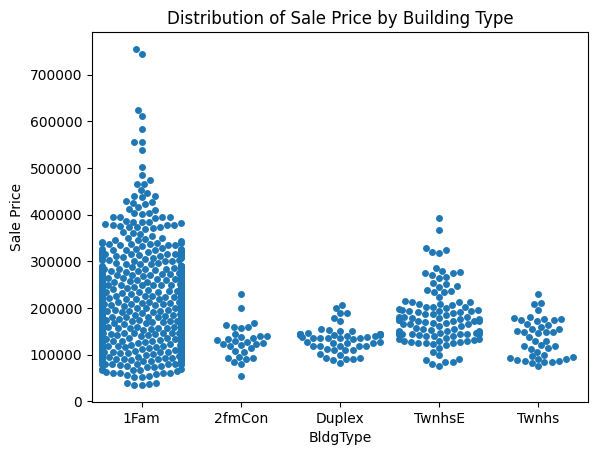

In [6]:
sns.swarmplot(x='BldgType',y='SalePrice',data=df)
plt.ylabel('Sale Price')
plt.title('Distribution of Sale Price by Building Type')
plt.show()

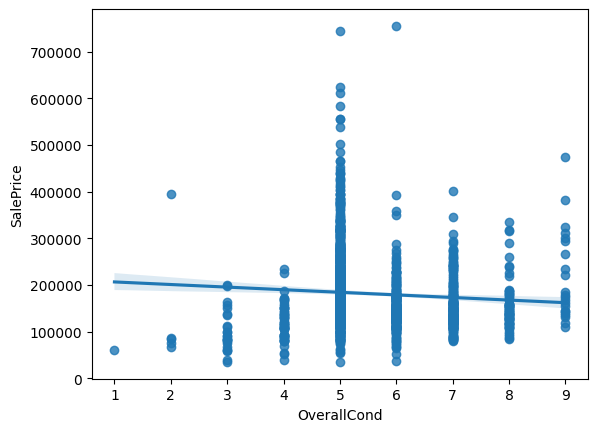

In [18]:
sns.regplot(x='OverallCond',y='SalePrice',data=df)
plt.show()

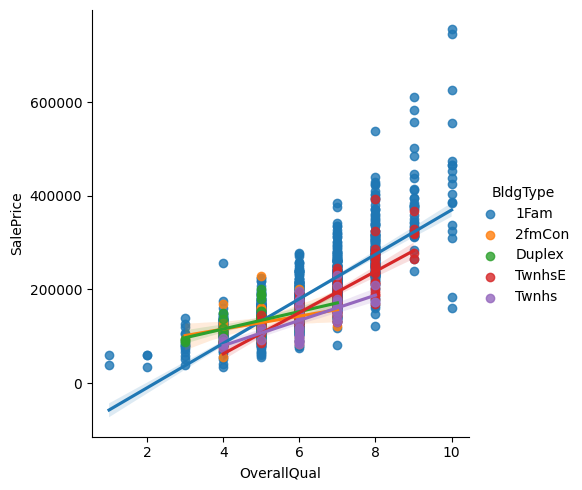

In [20]:
sns.lmplot(x='OverallQual',y='SalePrice',data=df,hue='BldgType')
plt.show()

*Data Preprocessing*

In [11]:
df_preprocessed = df.copy()
# Define threshold: More than 50% missing values
threshold = 0.5 * len(df)  # 50% of 1460

# Drop columns where the count of missing values exceeds the threshold
df_cleaned = df_preprocessed.drop(columns=df_preprocessed.columns[df_preprocessed.isnull().sum() > threshold])

df_cleaned['LotFrontage'].fillna(df_cleaned['LotFrontage'].median(), inplace=True)
# Display the remaining columns
print(df_cleaned.shape)  # Check new dimensions
#print(df_cleaned.head())  # Preview cleaned dataset
print(df_cleaned.isnull().sum())

(1460, 76)
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64


<ipython-input-11-9097888c8595>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['LotFrontage'].fillna(df_cleaned['LotFrontage'].median(), inplace=True)


In [13]:
df_no_missing_value = df_cleaned
print(df_no_missing_value['SalePrice'].describe())

count       747.000000
mean     218091.120482
std       86360.288174
min       62383.000000
25%      160000.000000
50%      192000.000000
75%      259750.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [14]:
# calculate the skewness and kurtosis of a numeric column
print(df_no_missing_value['SalePrice'].skew())
print(df_no_missing_value['SalePrice'].kurtosis())

1.788010559787513
5.529441439410767


In [15]:
print(df_no_missing_value['SalePrice'].corr(df_no_missing_value['OverallCond']))

-0.09633650024801


In [16]:
from scipy.stats import ttest_ind

t,p = ttest_ind(df_no_missing_value['SalePrice'],df_no_missing_value['OverallCond'])
print(t,p)

69.01972023806871 0.0


In [21]:
from scipy.stats import f_oneway
f,p = f_oneway(df_no_missing_value['SalePrice'],df_no_missing_value['OverallQual'])
print(f,p)

4763.670024148967 0.0


In [22]:
print(df_no_missing_value.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   
6   7          20       RL         75.0    10084   Pave      Reg         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   
6    AllPub    Inside  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
1    

In [24]:
df_select_columns = df_no_missing_value.drop(columns = ['MSSubClass','Street','LotShape','LandContour','Utilities','LandSlope','Condition1','Condition2','RoofStyle','RoofMatl',\
                                                        'Exterior1st','Exterior2nd','MasVnrArea','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtUnfSF','Electrical'])

In [ ]:
#I would probably delete a lot more variables. But I don't know how to decide on which to delete and which to keep at this stage


In [25]:
df_processed_again = pd.get_dummies(df_select_columns,columns = ['BldgType','HouseStyle','OverallQual','OverallCond'])
print(df_processed_again.head())
# I don't know how to decide on which variables need to be encoded. Especially when the encoding can lead to more unnecessary variables

   Id MSZoning  LotFrontage  LotArea LotConfig Neighborhood  YearBuilt  \
1   2       RL         80.0     9600       FR2      Veenker       1976   
2   3       RL         68.0    11250    Inside      CollgCr       2001   
3   4       RL         60.0     9550    Corner      Crawfor       1915   
4   5       RL         84.0    14260       FR2      NoRidge       2000   
6   7       RL         75.0    10084    Inside      Somerst       2004   

   YearRemodAdd ExterQual ExterCond  ... OverallQual_9 OverallQual_10  \
1          1976        TA        TA  ...         False          False   
2          2002        Gd        TA  ...         False          False   
3          1970        TA        TA  ...         False          False   
4          2000        Gd        TA  ...         False          False   
6          2005        Gd        TA  ...         False          False   

  OverallCond_2  OverallCond_3  OverallCond_4  OverallCond_5 OverallCond_6  \
1         False          False        

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Define the columns you want to check against 'SalePrice'
selected_columns = ['LotArea', 'YearBuilt', 'LotFrontage', 'YearRemodAdd','YrSold','BedroomAbvGr']

# Create a new DataFrame with only the selected columns and 'SalePrice'
X = df_processed_again[selected_columns + ['SalePrice']]

# Compute VIF for each selected feature (excluding 'SalePrice')
vif_data = pd.DataFrame()
vif_data["Feature"] = selected_columns
vif_data["VIF"] = [variance_inflation_factor(X[selected_columns].values, i) for i in range(len(selected_columns))]

# Display results
print(vif_data.sort_values(by="VIF", ascending=False))


        Feature           VIF
3  YearRemodAdd  19350.306760
4        YrSold  11246.377988
1     YearBuilt   8971.765705
5  BedroomAbvGr     16.981238
2   LotFrontage     11.861079
0       LotArea      1.986424


In [28]:
#This would suggest that I would need to delete the following columns ['YearBuilt', 'LotFrontage', 'YearRemodAdd','YrSold','BedroomAbvGr']

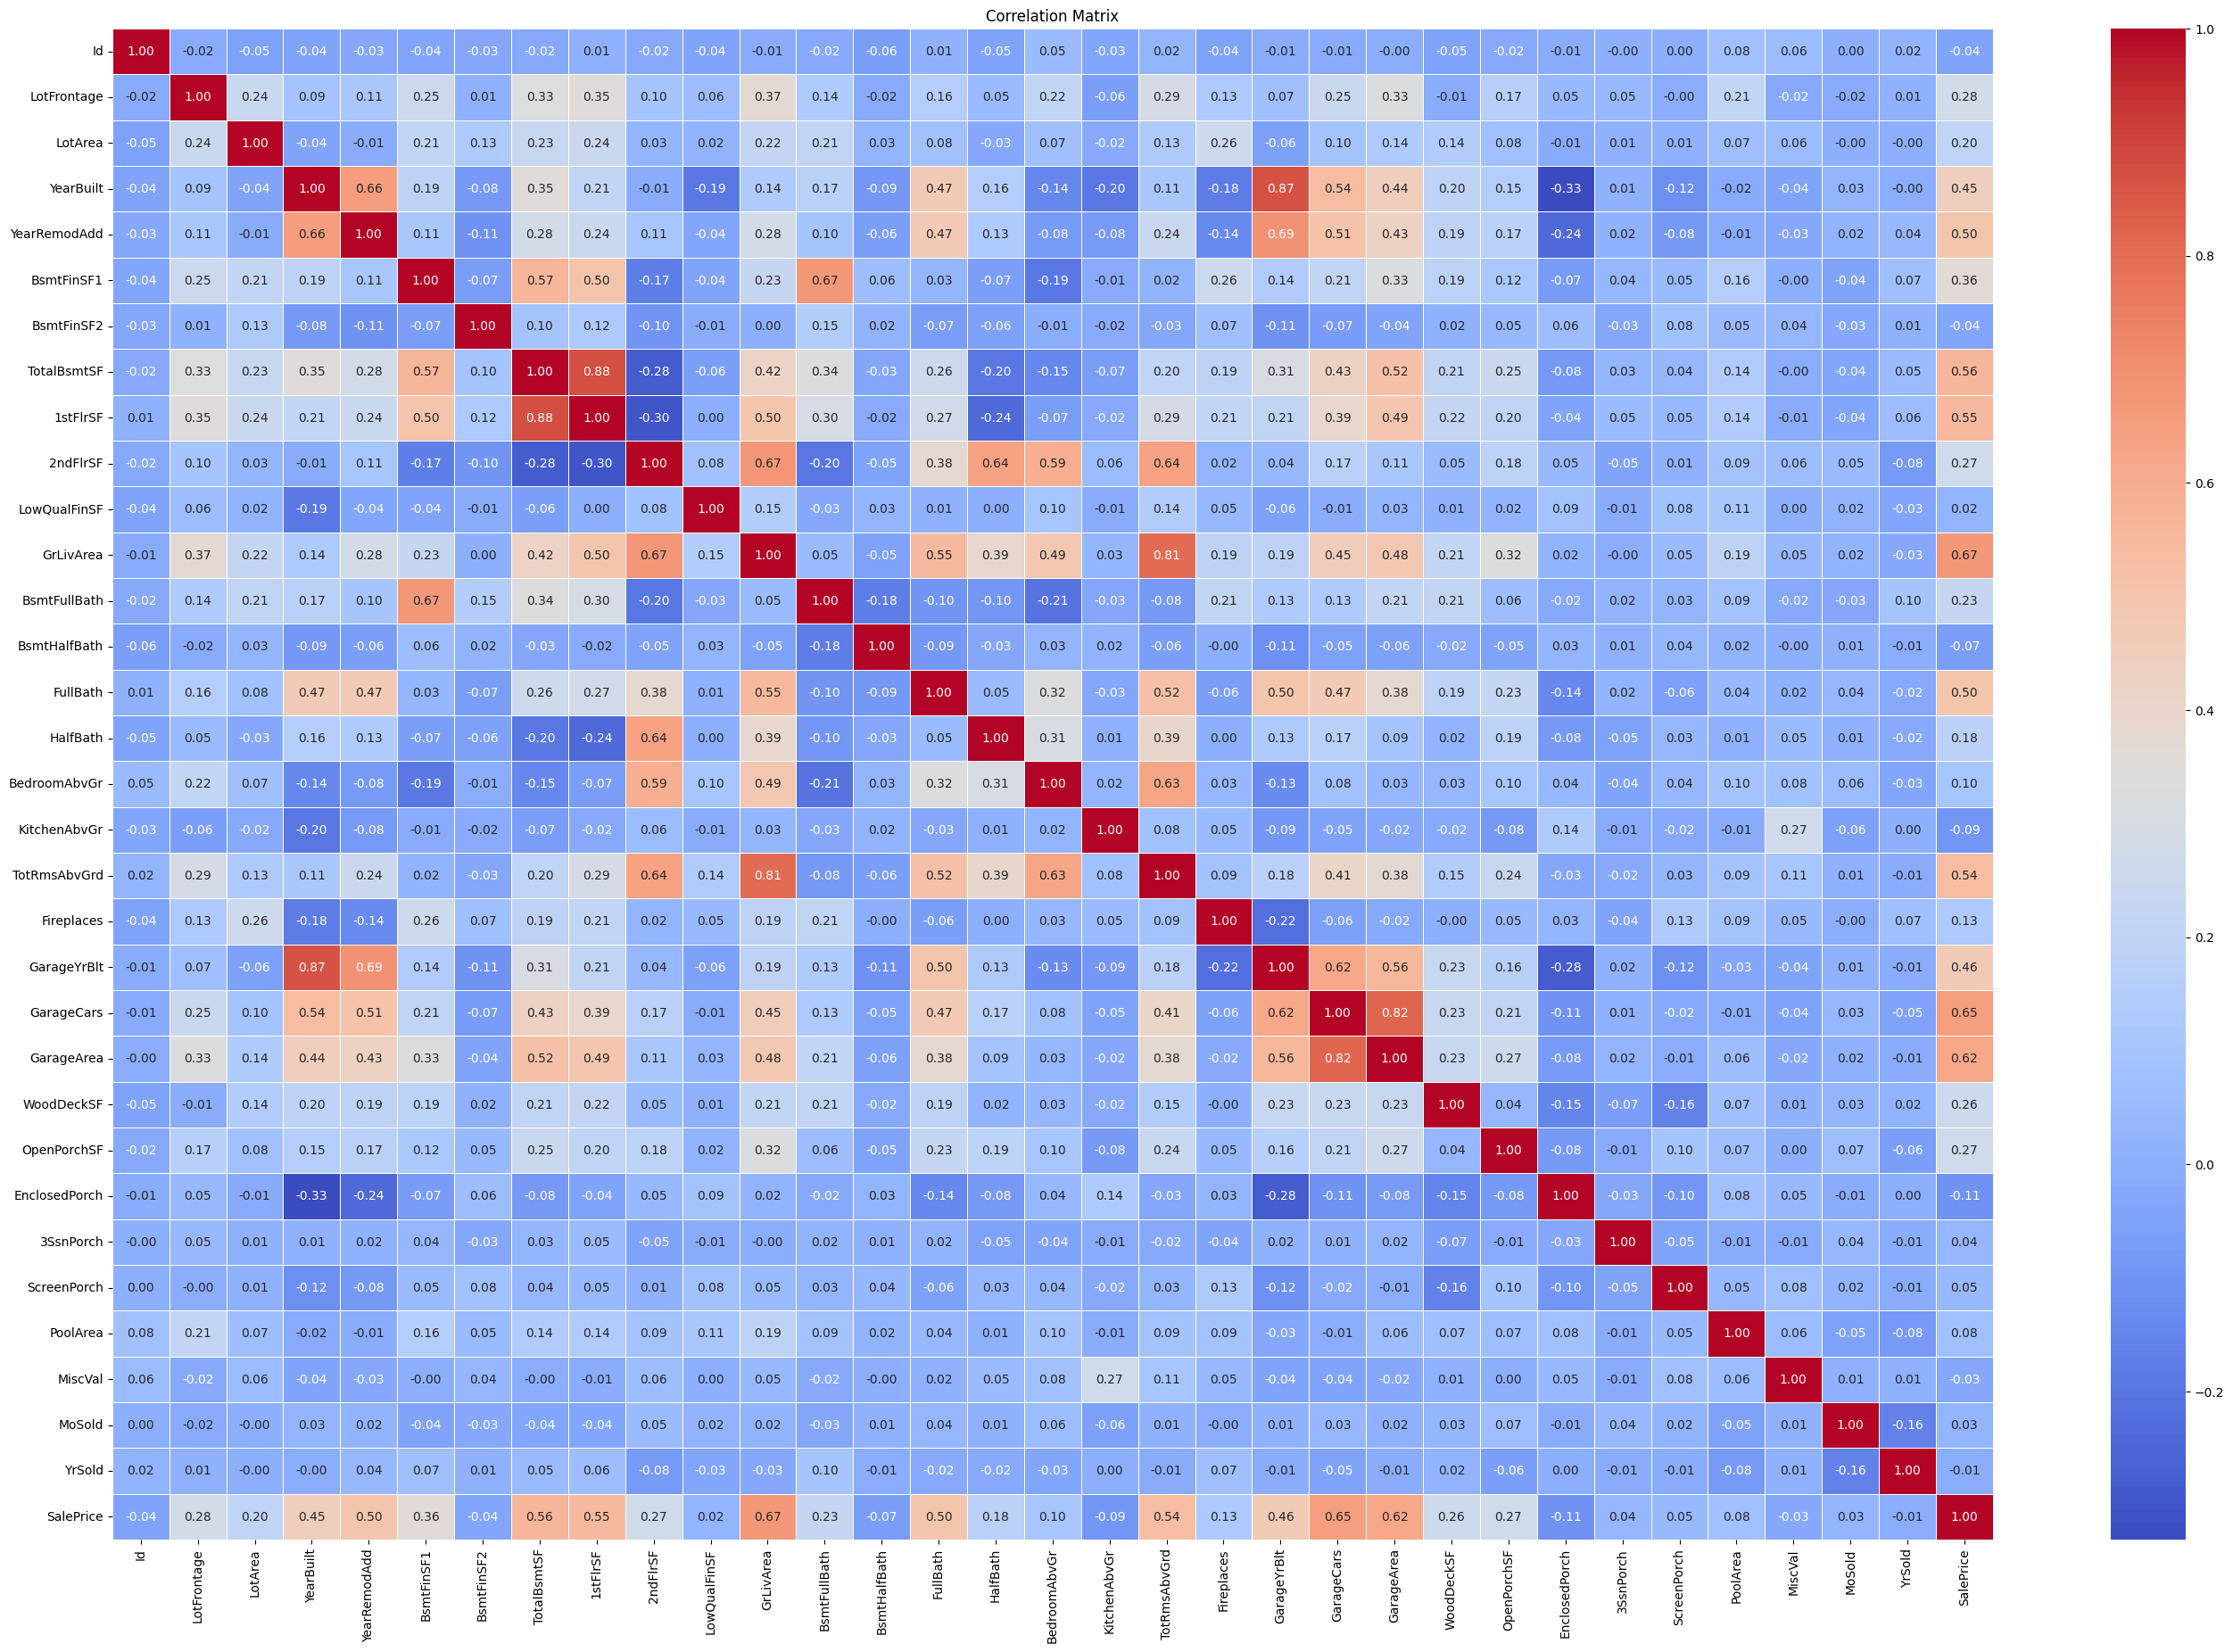

In [31]:
import numpy as np
# Select only numerical columns
numerical_df = df_processed_again.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numerical_df.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(34, 22))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()
